In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las librerias que vamos a usar

In [2]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np
import pandas as pd

# Libreria para graficos
from matplotlib import pyplot
import matplotlib.pyplot as plt

#libreria para dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split

#libreria para transformar textos a numeros
from sklearn.preprocessing import LabelEncoder

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

Cargamos el dataset y procesamos algunos datos

In [3]:
data = pd.read_csv('/content/drive/MyDrive/SIS420 IA 1/datasets/Propios/star_classification.csv', delimiter=',')
#display(data)
data = data.drop(['obj_ID','rerun_ID'], axis = 1 ) #borramos la columna obj_ID porque tiene ID's unicos y rerun_ID que tiene un solo valor en todas las filas
display(data)

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


# 1.- Insertamos los nuevos atributos que contengan: caracteres, texto y valores booleanos, que esten relacionados a la temática del dataset.

In [4]:
#"variable_brightness" atributo que indica si el objeto presenta una variabilidad en su brillo.
#Las estrellas tienden a tener variaciones más pronunciadas, mientras que las galaxias y cuásares pueden tener brillo más constante.
data_sintetico = data.copy()
data_sintetico['variable_brightness'] = np.random.choice([True, False], size=len(data_sintetico))

#"nuclear_activity" atributo que indica el tipo de actividad nuclear. Los cuásares suelen tener una actividad intensa, las galaxias menos,
#y las estrellas no tienen actividad nuclear central.'I' para actividad intensa, 'M' para moderada, 'N' para nada
valores_nuclear_activity = ['I', 'M', 'N']
data_sintetico['nuclear_activity'] = np.random.choice(valores_nuclear_activity, size=len(data_sintetico))


#"distance_description" este atributo de texto describe la distancia relativa del objeto, usando el desplazamiento al rojo (redshift)
# para determinar si es una estrella cercana, una galaxia distante o un cuásar muy distante.

descripciones_distancia = [
    'Very close object',
    'Moderately distant object',  # Define posibles descripciones para la columna de texto
    'Far object',
    'Extremely distant object'
]
data_sintetico['distance_description'] = np.random.choice(descripciones_distancia, size=len(data_sintetico)) #Asignar aleatoriamente descripciones a la nueva columna

#display(data_sintetico)
print(data_sintetico.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   alpha                 100000 non-null  float64
 1   delta                 100000 non-null  float64
 2   u                     100000 non-null  float64
 3   g                     100000 non-null  float64
 4   r                     100000 non-null  float64
 5   i                     100000 non-null  float64
 6   z                     100000 non-null  float64
 7   run_ID                100000 non-null  int64  
 8   cam_col               100000 non-null  int64  
 9   field_ID              100000 non-null  int64  
 10  spec_obj_ID           100000 non-null  float64
 11  class                 100000 non-null  object 
 12  redshift              100000 non-null  float64
 13  plate                 100000 non-null  int64  
 14  MJD                   100000 non-null  int64  
 15  f

Convertimos las columnas que contienen texto o letras a números

In [5]:
#convertimos la columna con valores Booleanos a numeros
data_sintetico['variable_brightness'] = data_sintetico['variable_brightness'].astype(int)

#selecciona las columnas del dataset de tipo object
columnas_categoricas = data_sintetico.select_dtypes(include=['object']).columns

for columna in columnas_categoricas: #Recorremos cada columna categorica
  #El LabelEncoder se utiliza para codificar las etiquetas categóricas como valores numéricos
  le = LabelEncoder() #creamos una instancia de LabelEncoder()
  data_sintetico[columna] = le.fit_transform(data_sintetico[columna])  #Su método fit_transform ajusta y trasnforma los datos de la columna

display(data_sintetico)

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,variable_brightness,nuclear_activity,distance_description
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,0,0.634794,5812,56354,171,0,0,1
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,0,0.779136,10445,58158,427,1,0,1
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,0,0.644195,4576,55592,299,1,1,1
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,0,0.932346,9149,58039,775,1,2,3
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,0,0.116123,6121,56187,842,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,0,0.000000,9374,57749,438,1,1,0
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,0,0.404895,7626,56934,866,0,1,1
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,0,0.143366,2764,54535,74,0,1,3
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,0,0.455040,6751,56368,470,0,0,1


# 2.- Duplicamos los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

Esto lo hare aplicando una variacion aleatoria controlada a los valores ya existentes, la variacion sera del 10%

In [ ]:
porcentaje_variacion = 0.10  # Defino el porcentaje de variación
# Función para aplicar variaciones a los valores numéricos de tipo float64
def aplicar_variacion(valor, es_float):
    if es_float:
        # Generar un factor de variación aleatorio
        factor = np.random.uniform(1 - porcentaje_variacion, 1 + porcentaje_variacion)
        return valor * factor
    return valor

# Función para generar los nuevos valores
def generar_datos_modificados(df, porcentaje_variacion):
    datos_modificados = []

    # Identificar las columnas de tipo float64
    columnas_float64 = df.select_dtypes(include=[np.float64]).columns

    for index, fila in df.iterrows():
        # Agregar la fila original
        datos_modificados.append(fila)

        # Crear una nueva fila con valores alterados solo en columnas de tipo float64
        fila_modificada = fila.copy()

        for col in fila_modificada.index:
            es_float = col in columnas_float64
            fila_modificada[col] = aplicar_variacion(fila_modificada[col], es_float)

        # Agregar la fila modificada
        datos_modificados.append(fila_modificada)

    # Convertir el resultado en el formato DataFrame
    return pd.DataFrame(datos_modificados)

# Generar el DataFrame final en base a los datos ya existentes
data_sintetico_duplicado = generar_datos_modificados(data_sintetico, porcentaje_variacion)

# Guardar el DataFrame en un archivo CSV en la ruta específica de Google Drive
ruta_archivo = 'D:\2-2024\SIS420_Aldrin\Primer Parcial\data_sintetico.csv'
data_sintetico_duplicado.to_csv(ruta_archivo, index=False)

display(data_sintetico_duplicado)


,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,variable_brightness,nuclear_activity,distance_description
0,135.689107,32.494632,23.878820,22.275300,20.395010,19.165730,18.793710,3606.0,2.0,79.0,6.543777e+18,0.0,0.634794,5812.0,56354.0,171.0,1.0,2.0,1.0
0,147.819369,33.031025,24.172576,22.663140,20.838543,20.340965,20.374284,3606.0,2.0,79.0,7.062106e+18,0.0,0.684911,5812.0,56354.0,171.0,1.0,2.0,1.0
1,144.826101,31.274185,24.777590,22.831880,22.584440,21.168120,21.614270,4518.0,5.0,119.0,1.176014e+19,0.0,0.779136,10445.0,58158.0,427.0,1.0,1.0,1.0
1,132.050869,31.693771,25.255578,23.954760,20.698082,22.452642,23.041104,4518.0,5.0,119.0,1.169890e+19,0.0,0.849091,10445.0,58158.0,427.0,1.0,1.0,1.0
2,142.188790,35.582444,25.263070,22.663890,20.609760,19.348570,18.948270,3606.0,2.0,120.0,5.152200e+18,0.0,0.644195,4576.0,55592.0,299.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,214.102416,14.641448,20.336435,17.858346,19.033046,16.943927,16.931967,5314.0,4.0,308.0,3.276574e+18,0.0,0.136430,2764.0,54535.0,74.0,1.0,0.0,0.0
99998,212.268621,46.660365,25.350390,21.637570,19.913860,19.072540,18.624820,3650.0,4.0,131.0,7.601080e+18,0.0,0.455040,6751.0,56368.0,470.0,0.0,0.0,3.0
99998,193.248382,49.854719,23.775945,22.577158,19.405993,17.904703,16.779341,3650.0,4.0,131.0,7.526015e+18,0.0,0.498822,6751.0,56368.0,470.0,0.0,0.0,3.0
99999,196.896053,49.464643,22.621710,21.797450,20.601150,20.009590,19.280750,3650.0,4.0,60.0,8.343152e+18,0.0,0.542944,7410.0,57104.0,851.0,1.0,1.0,2.0


# 3.-Crea una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

funcion para graficar

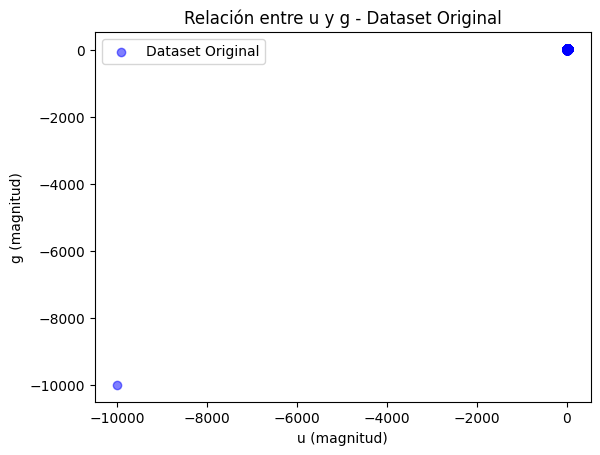

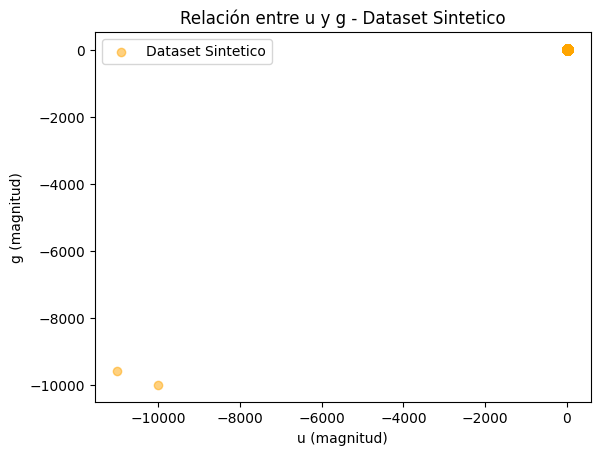

In [6]:
# Gráfico del dataset original
plt.figure()
plt.scatter(data['u'], data['g'], alpha=0.5, label='Dataset Original', color='blue')
plt.title('Relación entre u y g - Dataset Original')
plt.xlabel('u (magnitud)')
plt.ylabel('g (magnitud)')
plt.legend()
plt.show()


data_sintetico_duplicado = pd.read_csv('/content/drive/MyDrive/SIS420 IA 1/datasets/Propios/data_sintetico.csv', delimiter=',')
# Gráfico del dataset duplicado
plt.figure()
plt.scatter(data_sintetico_duplicado['u'], data_sintetico_duplicado['g'], alpha=0.5, color='orange', label='Dataset Sintetico')
plt.title('Relación entre u y g - Dataset Sintetico')
plt.xlabel('u (magnitud)')
plt.ylabel('g (magnitud)')
plt.legend()
plt.show()

#print(data['u'])
#print(data_sintetico_duplicado['u'])

# 4.-Dividir los datos del dataset sintético en datos de entrenamiento y prueba

Separamos datos de entrenamiento(80%) y prueba(20%) por cada clase, ya que cada clase tiene un diferente numero de datos

In [7]:
data = pd.read_csv('/content/drive/MyDrive/SIS420 IA 1/datasets/Propios/data_sintetico.csv', delimiter=',')

y_tem = data["class"]

data_class_0 = data[y_tem == 0]
train_class_0, test_class_0 = train_test_split(data_class_0, test_size=0.2, random_state=42)

data_class_1 = data[y_tem == 1]
train_class_1, test_class_1 = train_test_split(data_class_1, test_size=0.2, random_state=42)

data_class_2 = data[y_tem == 2]
train_class_2, test_class_2 = train_test_split(data_class_2, test_size=0.2, random_state=42)


In [8]:
print("para la clase 0 se tiene la cantidad total de: ",data_class_0.shape[0], "para el 80 %: ", train_class_0.shape[0], "para el 20 %: ", test_class_0.shape[0])
print("para la clase 1 se tiene la cantidad total de: ",data_class_1.shape[0], "para el 80 %: ", train_class_1.shape[0], "para el 20 %: ", test_class_1.shape[0])
print("para la clase 2 se tiene la cantidad total de: ",data_class_2.shape[0], "para el 80 %: ", train_class_2.shape[0], "para el 20 %: ", test_class_2.shape[0])
print("la cantidad total de datos es: ", data.shape[0])

para la clase 0 se tiene la cantidad total de:  118890 para el 80 %:  95112 para el 20 %:  23778
para la clase 1 se tiene la cantidad total de:  37922 para el 80 %:  30337 para el 20 %:  7585
para la clase 2 se tiene la cantidad total de:  43188 para el 80 %:  34550 para el 20 %:  8638
la cantidad total de datos es:  200000


asignamos los datos a X y Y (entrenamiento y prueba) de todas las clases(0,1,2)

In [9]:
X_train_class_0 = train_class_0.drop("class", axis=1)
y_train_class_0 = train_class_0["class"]

X_train_class_1 = train_class_1.drop("class", axis=1)
y_train_class_1 = train_class_1["class"]

X_train_class_2 = train_class_2.drop("class", axis=1)
y_train_class_2 = train_class_2["class"]

X_test_class_0 = test_class_0.drop("class", axis=1)
y_test_class_0 = test_class_0["class"]

X_test_class_1 = test_class_1.drop("class", axis=1)
y_test_class_1 = test_class_1["class"]

X_test_class_2 = test_class_2.drop("class", axis=1)
y_test_class_2 = test_class_2["class"]

Concatenamos los datos separados de todas las clases a una sola class_0   class_1   class_2    --> class
Asi tenemos los datos de entrenamiento en X_train y y_train, y los datos de prueba X_test y y_test

In [10]:
X_train = pd.concat([X_train_class_0, X_train_class_1, X_train_class_2]).values
y_train = pd.concat([y_train_class_0, y_train_class_1, y_train_class_2]).values

indices_train = np.random.permutation(len(X_train))
X_train = X_train[indices_train]
y_train = y_train[indices_train]
m_train = X_train.shape[0]


X_test = pd.concat([X_test_class_0, X_test_class_1, X_test_class_2]).values
y_test = pd.concat([y_test_class_0, y_test_class_1, y_test_class_2]).values

indices_test = np.random.permutation(len(X_test))
X_test = X_test[indices_test]
y_test = y_test[indices_test]
m_test = X_test.shape[0]

#print(X_train)
#print(y_train)

In [11]:
#encontrar el numero de ejemplos de entrenamiento y el numero de caracteristicas
print("la cantidad de ejemplos para entrenamiento es: ", len(X_train))
print("la cantidad de ejemplos para pruebas es: ", len(X_test))
print("la cantidad de caracteristicas es: ", X_train.shape[1])
print("la cantidad total de ejemplos: ", data.shape[0])

la cantidad de ejemplos para entrenamiento es:  159999
la cantidad de ejemplos para pruebas es:  40001
la cantidad de caracteristicas es:  18
la cantidad total de ejemplos:  200000


# 5.-(7,8,9)Entrenar un modelo de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

In [ ]:
# Concatenar X_train y y_train en data_train
data_train = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='class')], axis=1)

# Concatenar X_test y y_test en data_test
data_test = pd.concat([pd.DataFrame(X_test), pd.Series(y_test, name='class')], axis=1)

print(data_train['class'].unique())

[0. 1. 2.]


Funciones para todos los entrenamientos

In [ ]:
def  featureNormalize(X): #funcion para normalizar los datos
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [ ]:
def calcularCosto(theta, X, y): #funcion de costo para regresion logistica Binaria
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters): #funcion para ajustar el costo
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [ ]:
def predict(theta, X_test): #funcion de prediccion
    # Calcula las probabilidades utilizando la función sigmoide
    probabilities = sigmoid(X_test.dot(theta))
    #p = (probabilities >= 0.5).astype(int)
    p = np.round(sigmoid(X_test.dot(theta.T)))
    return p


Enrenando Estrellas y Galaxias (no Cuásares)

In [ ]:
#convertimos la columna de las clases, en una clase binaria, para una regrecion logistica binaria

y_train = np.where(data_train['class'] == 0, 1, 0)
y_test = np.where(data_test['class'] == 0, 1, 0)

#print(data_train.shape[0])
#print(y_train.size)
#mask = y_train != 0  # Crea una máscara booleana que es True donde y_train no es 0
#y_train_limpio = y_train[mask]
#print(y_train_limpio.size)

#asignamos los datos a X de entrenamiento de prueba
X_train = data_train.iloc[:,:18]
X_test = data_test.iloc[:,:18]

#imprimimos para verificar que valores contiene Y
print(np.unique(y_train))

#normalizamos los datos de X y guardamos sigma y mu para normalizar los datos de prueba mas adelante
X_norm, mu, sigma = featureNormalize(X_train)

#aplicamos la funcion de activacion(sigmoide)
g = sigmoid(X_norm)

#sacamos el numero de filas y columnas
m, n = g.shape

#añadimos la columna sesgo, bias o columnas de 1 en XO
X = np.concatenate([np.ones((m, 1)), g], axis=1)

#display(pd.DataFrame(X))
#display(X_train)
#display(X_norm)

[0 1]


Costo final: 0.6276
theta calculado por el descenso por el gradiente: [-0.04388558  0.10497476 -0.18048886  2.07731424  1.55455243  2.39423244
 -2.38984124 -0.62703915  0.28483479 -0.23771637  0.31704249 -0.02495618
 -2.42295014 -0.00334642 -0.27701297  0.34959975 -0.04514022 -0.0437205
 -0.02161956]


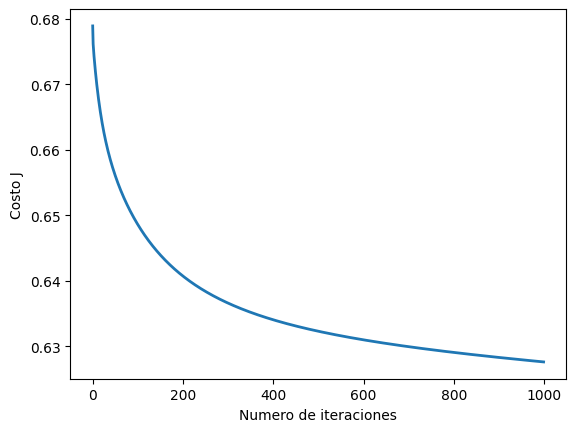

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 1
num_iters = 1000

theta = np.zeros(X.shape[1]) #inicia con cero el vecto de parametros
theta, J_history = descensoGradiente(theta, X, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

cost = J_history[:-1] #saca el ultimo valor del costo
print('Costo final: {:.4f}'.format(cost[-1]))

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
#normalizamos los valores de prueba con los valores de mu y sigma calculados en en el entrenamiento
X_test_norm = (X_test - mu) / sigma

#Añadimos la columna de 1 en X0
X = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

#Realizamos la prediccion usando la funcion creada anteriormente
y_predicted = predict(theta, X)

print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_predicted == y_test) * 100))

# asigna un limite para no imprimir todas las predicciones sino solo el numero especificado
num_to_print = min(10, len(y_predicted))

print("Resumen de las primeras predicciones:")

# Mostrar el valor esperado y el valor predicho para cada ejemplo
for i in range(num_to_print):
    print(f"Valor esperado: {y_test[i]}, Valor predicho: {int(y_predicted[i])}")
print(y_predicted.shape[0])

Precisión de entrenamiento: 63.75 %
Resumen de las primeras predicciones:
Valor esperado: 1, Valor predicho: 1
Valor esperado: 1, Valor predicho: 1
Valor esperado: 0, Valor predicho: 0
Valor esperado: 0, Valor predicho: 0
Valor esperado: 1, Valor predicho: 0
Valor esperado: 0, Valor predicho: 0
Valor esperado: 1, Valor predicho: 0
Valor esperado: 0, Valor predicho: 1
Valor esperado: 1, Valor predicho: 0
Valor esperado: 1, Valor predicho: 1
40001


Enrenando Estrellas y Cuásares (no Galaxias)

In [ ]:
#convertimos la columna de las clases, en una clase binaria, para una regrecion logistica binaria
y_train = np.where(data_train['class'] == 1, 1, 0)
y_test = np.where(data_test['class'] == 1, 1, 0)

#asignamos los datos a X de entrenamiento de prueba
X_train = data_train.iloc[:,:18]
X_test = data_test.iloc[:,:18]

#imprimimos para verificar que valores contiene Y
print(np.unique(y_train))

#normalizamos los datos de X y guardamos sigma y mu para normalizar los datos de prueba mas adelante
X_norm, mu, sigma = featureNormalize(X_train)

#aplicamos la funcion de activacion(sigmoide)
g = sigmoid(X_norm)

#sacamos el numero de filas y columnas
m, n = g.shape

#añadimos la columna sesgo, bias o columnas de 1 en XO
X = np.concatenate([np.ones((m, 1)), g], axis=1)

#display(pd.DataFrame(X))
#display(X_train)
#display(X_norm)

[0 1]


Costo final: 0.1374
theta calculado por el descenso por el gradiente: [-4.74871393  0.49196007  0.99339859 -7.63182204 -5.8730743  -4.43641213
  1.81043285 -1.02468991  0.07731971  0.0908695  -0.07556956  0.25972222
 22.2643478   0.15916856 -2.05118956 -0.07936884  0.04382038  0.15808575
 -0.07363644]


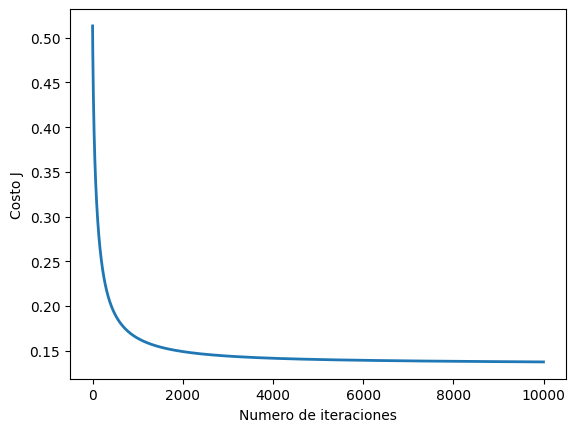

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 1
num_iters = 10000

theta = np.zeros(X.shape[1]) #inicia con cero el vecto de parametros
theta, J_history = descensoGradiente(theta, X, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

cost = J_history[:-1] #saca el ultimo valor del costo
print('Costo final: {:.4f}'.format(cost[-1]))

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
#normalizamos los valores de prueba con los valores de mu y sigma calculados en en el entrenamiento
X_test_norm = (X_test - mu) / sigma

#Añadimos la columna de 1 en X0
X = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

#Realizamos la prediccion usando la funcion creada anteriormente
y_predicted = predict(theta, X)

print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_predicted == y_test) * 100))

# asigna un limite para no imprimir todas las predicciones sino solo el numero especificado
num_to_print = min(10, len(y_predicted))

print("Resumen de las primeras predicciones:")

# Mostrar el valor esperado y el valor predicho para cada ejemplo
for i in range(num_to_print):
    print(f"Valor esperado: {y_test[i]}, Valor predicho: {int(y_predicted[i])}")
print(y_predicted.shape[0])

Precisión de entrenamiento: 95.38 %
Resumen de las primeras predicciones:
Valor esperado: 0, Valor predicho: 0
Valor esperado: 0, Valor predicho: 0
Valor esperado: 1, Valor predicho: 1
Valor esperado: 1, Valor predicho: 1
Valor esperado: 0, Valor predicho: 0
Valor esperado: 1, Valor predicho: 1
Valor esperado: 0, Valor predicho: 0
Valor esperado: 0, Valor predicho: 0
Valor esperado: 0, Valor predicho: 0
Valor esperado: 0, Valor predicho: 0
40001


Enrenando Galaxias y Cuásares (no Estrellas)

In [ ]:
#convertimos la columna de las clases, en una clase binaria, para una regrecion logistica binaria
y_train = np.where(data_train['class'] == 2, 1, 0)
y_test = np.where(data_test['class'] == 2, 1, 0)

#asignamos los datos a X de entrenamiento de prueba
X_train = data_train.iloc[:,:18]
X_test = data_test.iloc[:,:18]

#imprimimos para verificar que valores contiene Y
print(np.unique(y_train))

#normalizamos los datos de X y guardamos sigma y mu para normalizar los datos de prueba mas adelante
X_norm, mu, sigma = featureNormalize(X_train)

#aplicamos la funcion de activacion(sigmoide)
g = sigmoid(X_norm)

#sacamos el numero de filas y columnas
m, n = g.shape

#añadimos la columna sesgo, bias o columnas de 1 en XO
X = np.concatenate([np.ones((m, 1)), g], axis=1)

#display(pd.DataFrame(X))
#display(X_train)
#display(X_norm)

[0 1]


Costo final: 0.4975
theta calculado por el descenso por el gradiente: [-0.17160824 -0.09806852 -0.09030002 -0.09679342 -0.09836074 -0.19522346
 -0.16381125 -0.08938865 -0.10480849 -0.06118664 -0.10186855 -0.16846988
 -0.40897791 -0.16894298 -0.15707002 -0.12574225 -0.07610307 -0.08181541
 -0.07798205]


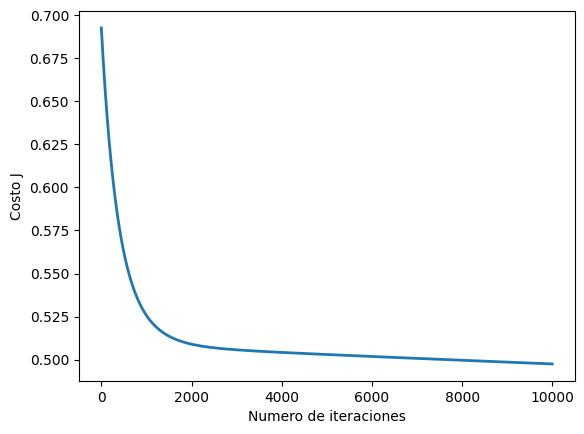

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

theta = np.zeros(X.shape[1]) #inicia con cero el vecto de parametros
theta, J_history = descensoGradiente(theta, X, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

cost = J_history[:-1] #saca el ultimo valor del costo
print('Costo final: {:.4f}'.format(cost[-1]))

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [ ]:
#normalizamos los valores de prueba con los valores de mu y sigma calculados en en el entrenamiento
X_test_norm = (X_test - mu) / sigma

#Añadimos la columna de 1 en X0
X = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

#Realizamos la prediccion usando la funcion creada anteriormente
y_predicted = predict(theta, X)

print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_predicted == y_test) * 100))

# asigna un limite para no imprimir todas las predicciones sino solo el numero especificado
num_to_print = min(10, len(y_predicted))

print("Resumen de las primeras predicciones:")

# Mostrar el valor esperado y el valor predicho para cada ejemplo
for i in range(num_to_print):
    print(f"Valor esperado: {y_test[i]}, Valor predicho: {int(y_predicted[i])}")
print(y_predicted.shape[0])

Precisión de entrenamiento: 66.22 %
Resumen de las primeras predicciones:
Valor esperado: 0, Valor predicho: 1
Valor esperado: 0, Valor predicho: 0
Valor esperado: 0, Valor predicho: 0
Valor esperado: 0, Valor predicho: 0
Valor esperado: 0, Valor predicho: 1
Valor esperado: 0, Valor predicho: 0
Valor esperado: 0, Valor predicho: 0
Valor esperado: 1, Valor predicho: 0
Valor esperado: 0, Valor predicho: 0
Valor esperado: 0, Valor predicho: 0
40001


# 6.-(7,8,9)Entrenar un modelo One-vs-All para reemplazar el modelo desarrollado en el puntos 5

Datos de entrenamiento y prueba

In [19]:
# Concatenar X_train y y_train en data_train
data_train = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='class')], axis=1)

# Concatenar X_test y y_test en data_test
data_test = pd.concat([pd.DataFrame(X_test), pd.Series(y_test, name='class')], axis=1)

print(data_train['class'].unique())

[0. 1. 2.]


Funciones necesarias para entrenar este modelo

In [12]:
def  featureNormalize(X): #funcion para normalizar los datos
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [13]:
def sigmoid(z): #funcion de activacion
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

In [14]:
def calcularCosto(theta, X, y, lambda_):#funcion de costo para regresiones logisticas multiclase
    m = y.size
    h = sigmoid(X.dot(theta))
    cost = (-1 / m) * (y.dot(np.log(h + 1e-8)) + (1 - y).dot(np.log(1 - h + 1e-8)))
    reg = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return cost + reg

In [15]:
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_): #funcion para optimizar el costo
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * X.T.dot(h - y)
        gradient[1:] += (lambda_ / m) * theta[1:]
        theta = theta - alpha * gradient

        J_history.append(calcularCosto(theta, X, y, lambda_))
    return theta, J_history

In [16]:
def oneVsAll(X, y, num_labels, alpha, num_iters, lambda_):
    m, n = X.shape

    # Inicializa todos los parámetros theta
    all_theta = np.zeros((num_labels, n + 1))
    all_J_history = []

    # Agrega una columna de unos a X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        # Inicializa theta para la clase c
        initial_theta = np.zeros(n + 1)

        # Entrena el clasificador usando descenso por el gradiente
        theta, J_history = descensoGradiente(initial_theta, X, (y == c).astype(int), alpha, num_iters, lambda_)

        all_theta[c] = theta
        all_J_history.append(J_history)

    return all_theta, all_J_history


In [17]:
def predictOneVsAll(all_theta, X):

    # Número de ejemplos
    m = X.shape[0]

    # Número de etiquetas
    num_labels = all_theta.shape[0]
    # Inicializar la matriz de predicciones
    p = np.zeros(m)

    # Calcula las probabilidades de cada clase para cada ejemplo
    h = sigmoid(X.dot(all_theta.T))

    # Encuentra la clase con la mayor probabilidad
    p = np.argmax(h, axis=1)
    return p


Entrenamos el modelo

Costo final del clasificador para la clase 0: 0.6191
Costo final del clasificador para la clase 1: 0.1661
Costo final del clasificador para la clase 2: 0.2916


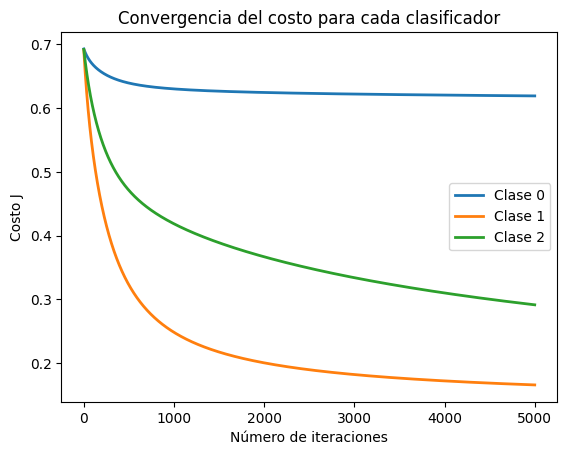

In [20]:
X_train = data_train.iloc[:,:18]
y_train = data_train.iloc[:,18]

#Normalizamos los datos para el entrenamiento y guardamos los valores de mu y sigma para usarlo en la prueba
X_norm, mu, sigma = featureNormalize(X_train)
m, n = X_norm.shape #sacamos el numero de filas y columnas de los datos de entrenamiento

#parametros necesarios
num_labels = 3 # Número de etiquetas (clases) (estrellas,galaxias,quasares)
alpha = 0.01   # Tasa de aprendizaje
num_iters = 5000 # Número de iteraciones
lambda_ = 0.1 #componente de regulacion

#entrenamiento del modelo
all_theta, all_J_history = oneVsAll(X_norm, y_train, num_labels, alpha, num_iters, lambda_)

# Imprime los costos finales de cada clasificador
for i in range(num_labels):
    final_cost = all_J_history[i][-1]  # Costo final del clasificador i
    print(f'Costo final del clasificador para la clase {i}: {final_cost:.4f}')

# Grafica la convergencia del costo de cada clasificador
for i in range(num_labels):
    plt.plot(np.arange(len(all_J_history[i])), all_J_history[i], lw=2, label=f'Clase {i}')

plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.legend()
plt.title('Convergencia del costo para cada clasificador')
plt.show()

#display(y_train)

In [21]:
#asignamos los datos de prueba a X y Y
X_test = data_test.iloc[:,:18]
y_test = data_test.iloc[:,18]

# Normaliza los datos de prueba
X_test_norm = (X_test - mu) / sigma

#Agregamos la columna de 1 como x0
X_test_norm = np.concatenate([np.ones((X_test_norm.shape[0], 1)), X_test_norm], axis=1)

# Realiza la predicción
p = predictOneVsAll(all_theta, X_test_norm)

# Calcula y muestra la precisión del conjunto de prueba
print('Precisión del conjunto de prueba: {:.2f}%'.format(np.mean(p == y_test) * 100))

# Muestra algunas predicciones y sus valores reales
for i in range(10):
    print("Predicción: ", p[i], "Valor real: ", y_test[i])


Precisión del conjunto de prueba: 75.43%
Predicción:  0 Valor real:  0.0
Predicción:  0 Valor real:  0.0
Predicción:  0 Valor real:  1.0
Predicción:  0 Valor real:  0.0
Predicción:  1 Valor real:  1.0
Predicción:  2 Valor real:  2.0
Predicción:  0 Valor real:  2.0
Predicción:  0 Valor real:  0.0
Predicción:  0 Valor real:  0.0
Predicción:  0 Valor real:  0.0
